In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



But this flexibility comes at a cost: to allow these flexible types, each item in the list must contain its own type info, reference count, and other information–that is, each item is a complete Python object. In the special case that all variables are of the same type, much of this information is redundant: it can be much more efficient to store data in a fixed-type array. The difference between a dynamic-type list and a fixed-type (NumPy-style) array is illustrated in the following figure:

Array Memory Layout
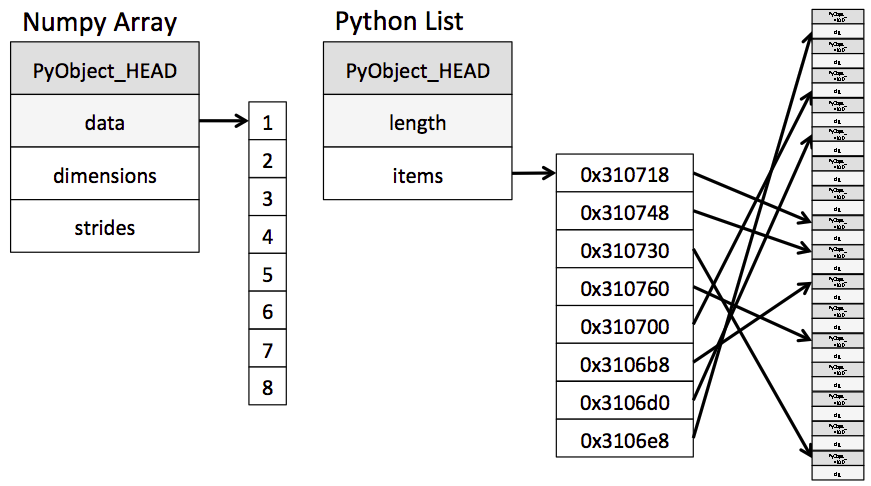

At the implementation level, the array essentially contains a single pointer to one contiguous block of data. The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object like the Python integer we saw earlier. Again, the advantage of the list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type. Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for storing and manipulating data.


<class 'list'>
[1 2 3 4]
<class 'numpy.ndarray'>
(4,)


In [3]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
x[:5]  # first five elements


array([0, 1, 2, 3, 4])

In [27]:
x[5:]  # elements after index 5

array([5, 6, 7, 8, 9])

In [28]:
x[4:7]  # middle sub-array

array([4, 5, 6])

In [29]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

In [30]:
x[1::2]  # every other element, starting at index 1

array([1, 3, 5, 7, 9])

In [32]:
x[::-1]  # all elements, reversed


array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [35]:
x[5::-2]  # reversed every other from index 5


array([5, 3, 1])

In [27]:
my_list = [1,2,3,4]
print (type(my_list))
my_listarr = np.array(my_list)
print (my_listarr)
print (type(my_listarr))
print (my_listarr.shape)

<class 'list'>
[1 2 3 4]
<class 'numpy.ndarray'>
(4,)


In [38]:
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x2

array([[2, 6, 9, 3],
       [6, 3, 1, 1],
       [5, 9, 0, 7]])

In [39]:
x2[:2, :3]  # two rows, three columns


array([[2, 6, 9],
       [6, 3, 1]])

In [40]:
print(x2[0, :])  # first row of x2

[2 6 9 3]


In [41]:
print(x2[0])  # equivalent to x2[0, :]

[2 6 9 3]


In [36]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [15]:
np.array([3.14, 4, 2, 3])


array([ 3.14,  4.  ,  2.  ,  3.  ])

In [16]:
np.array([1, 2, 3, 4], dtype='float32')

array([ 1.,  2.,  3.,  4.], dtype=float32)

In [8]:
# nested lists result in multi-dimensional arrays
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [12]:
np.array(range(2,5))

array([2, 3, 4])


# Concatenation of arrays

Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines np.concatenate, np.vstack, and np.hstack. np.concatenate takes a tuple or list of arrays as its first argument, as we can see here:


In [15]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [16]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


In [17]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [18]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [19]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays of mixed dimensions, it can be clearer to use the np.vstack (vertical stack) and np.hstack (horizontal stack) functions:

In [20]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [22]:
# horizontally stack the arrays
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])


# Splitting of arrays

The opposite of concatenation is splitting, which is implemented by the functions np.split, np.hsplit, and np.vsplit. For each of these, we can pass a list of indices giving the split points:


In [23]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [24]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [25]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


In [13]:
arr = np.zeros((4,2), dtype=np.uint8)
print (arr)
print (arr.shape)
print (arr.dtype)

[[0 0]
 [0 0]
 [0 0]
 [0 0]]
(4, 2)
uint8


In [14]:
my_arr = np.zeros((4,2))
print (my_arr.shape)
my_arr[:,0] +=1.0
my_arr[:,1] +=2.0
print (np.unique(my_arr, return_counts=True))
print (my_arr)

(4, 2)
(array([ 1.,  2.]), array([4, 4]))
[[ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]]


In [5]:
ones = np.ones((4,2), dtype=np.uint8)
print (np.unique(ones))

[1]


In [18]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[ 3.14,  3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14,  3.14]])

In [19]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [20]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [21]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random((3, 3))

array([[ 0.4508227 ,  0.28945332,  0.75213991],
       [ 0.49533754,  0.7683636 ,  0.37843146],
       [ 0.67740561,  0.94379382,  0.30362027]])

In [22]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[-0.30811621,  0.70589164, -1.81563209],
       [ 0.34433053, -0.66925984, -0.55028932],
       [-0.08002894, -0.69306157, -0.82147283]])

In [23]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

array([[4, 1, 6],
       [1, 5, 2],
       [6, 3, 1]])

In [24]:
# Create a 3x3 identity matrix
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

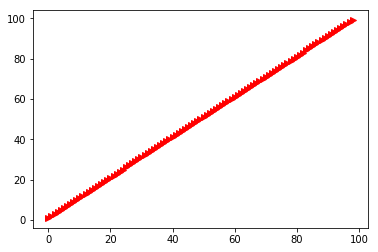

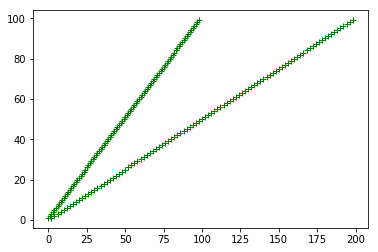

In [12]:
a = np.array(range(1,100))
plt.figure(0)
plt.plot(a,'r>')
plt.show()
plt.figure(1)
plt.plot(a*2,a,'g+')
plt.plot(a,'g+')
plt.show()

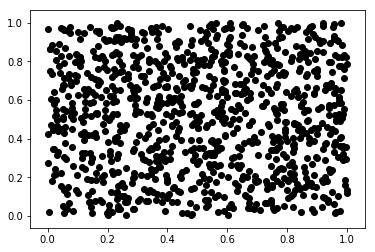

In [7]:
arr = np.random.random((1000,2))
arr1 = np.random.random((1000000,2))
plt.scatter(arr[:,0], arr[:,1],color='black')
#plt.scatter(arr1[:,0], arr1[:,1], color='green')
plt.show()